In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [8]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
# Number of rows where target is 1
df[df.target == 1].shape

(50, 5)

In [14]:
# Create new column flower_name by using the feature names and target value
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
# Visualize data, use matplotlib
from matplotlib import pyplot as plt

In [19]:
# Seperate to multiple dataframe based on target value
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


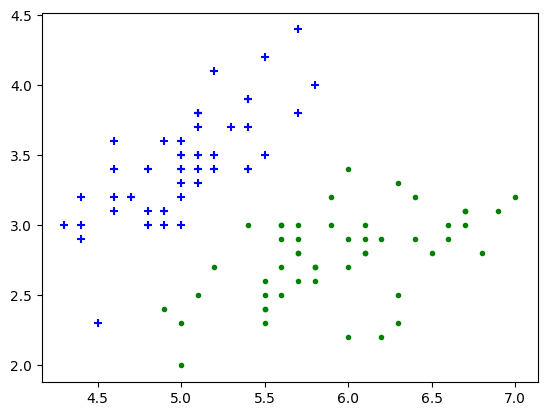

In [22]:
# Plot any two feature of the same data frame to look into the scatter plot
# Check how they are distributed if there is any clear classification
# From the plot it is clear that there is clear boundary between two dataframe, we can separate them easily using a line or plane
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='blue', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', marker='.')

In [28]:
X = df.drop(['target', 'flower_name'],axis='columns')
X.shape

(150, 4)

In [24]:
y = df.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(120, 4)

In [43]:
model = SVC(gamma=1, kernel='linear')
model.fit(X_train, y_train)

SVC(gamma=1, kernel='linear')

In [44]:
model.score(X_test, y_test)

1.0